# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters
#me begin: data frame can imagine as an excel table
#first row:label
#you can also label the columns e.g. with time
#a single column is a series: series is a generalization of a 
#numpy array, they have an index and we can label the index
#e.g. through time
#me: end
# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print(xs[3])
#you can access element of multiiple indeces
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

1.5
<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)# creating series from dictionary just passing 
#the dictionary to the constructor



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
print(s[:-1])
s = s[1:] + s[:-1]
print(s)

a    0.200744
b    0.766787
c   -1.718450
d    1.773910
e   -0.582558
dtype: float64
a    0.200744
b    0.766787
c   -1.718450
d    1.773910
dtype: float64
a         NaN
b    1.533574
c   -3.436899
d    3.547819
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-12-02
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 1970
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-09-11':'2020-09-13'], '\n') # Note - includes end time


2020-09-11 14:45:00    9.352609
2020-09-12 14:45:00    8.844580
2020-09-13 14:45:00    8.221470
2020-09-14 14:45:00    8.891094
Freq: D, dtype: float64 

2020-09-11 14:45:00    9.352609
2020-09-12 14:45:00    8.844580
2020-09-13 14:45:00    8.221470
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
#we fill up randomly 4 features called A,B,C,D with a np array 10*4
df #nice formatting
#print(df) #worst formatting



,A,B,C,D
2020-11-09 14:45:00,0.529403,0.542607,-0.434054,0.294319
2020-11-09 15:45:00,0.675036,-0.072117,-0.002215,-0.508393
2020-11-09 16:45:00,1.849588,0.807664,-1.367702,0.047446
2020-11-09 17:45:00,1.073647,-0.737218,0.029439,0.933042
2020-11-09 18:45:00,-0.328752,0.579864,0.573773,-0.037665
2020-11-09 19:45:00,0.310259,-0.880785,1.202151,-0.351948
2020-11-09 20:45:00,-0.640375,0.236437,-2.242825,2.602146
2020-11-09 21:45:00,-0.811103,0.410000,1.166831,0.119051
2020-11-09 22:45:00,0.920007,0.283930,-0.466992,1.460613
2020-11-09 23:45:00,0.298445,0.802010,1.987553,1.016893


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
#the keys of the dictionaries are the labels
#what comes after is the column, so e.g. when we have 1. the column 
#labelled with A will be filled with 4 in all its extent
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head(1)
df.head()

,A,B,C,D
2020-11-09 14:45:00,0.529403,0.542607,-0.434054,0.294319
2020-11-09 15:45:00,0.675036,-0.072117,-0.002215,-0.508393
2020-11-09 16:45:00,1.849588,0.807664,-1.367702,0.047446
2020-11-09 17:45:00,1.073647,-0.737218,0.029439,0.933042
2020-11-09 18:45:00,-0.328752,0.579864,0.573773,-0.037665


In [13]:
df.tail(4)

,A,B,C,D
2020-11-09 20:45:00,-0.640375,0.236437,-2.242825,2.602146
2020-11-09 21:45:00,-0.811103,0.410000,1.166831,0.119051
2020-11-09 22:45:00,0.920007,0.283930,-0.466992,1.460613
2020-11-09 23:45:00,0.298445,0.802010,1.987553,1.016893


In [14]:
df.index

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 5.29402863e-01,  5.42606700e-01, -4.34054175e-01,
         2.94318506e-01],
       [ 6.75036379e-01, -7.21165886e-02, -2.21535564e-03,
        -5.08392835e-01],
       [ 1.84958760e+00,  8.07664367e-01, -1.36770248e+00,
         4.74461711e-02],
       [ 1.07364720e+00, -7.37218081e-01,  2.94391742e-02,
         9.33042169e-01],
       [-3.28751763e-01,  5.79864365e-01,  5.73772908e-01,
        -3.76653116e-02],
       [ 3.10259212e-01, -8.80785306e-01,  1.20215111e+00,
        -3.51948331e-01],
       [-6.40374714e-01,  2.36437025e-01, -2.24282510e+00,
         2.60214568e+00],
       [-8.11103498e-01,  4.10000139e-01,  1.16683120e+00,
         1.19051066e-01],
       [ 9.20007272e-01,  2.83929953e-01, -4.66992060e-01,
         1.46061334e+00],
       [ 2.98445366e-01,  8.02009823e-01,  1.98755340e+00,
         1.01689287e+00]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.387616,0.197239,0.044596,0.557550
std,0.817514,0.593133,1.263795,0.953786
min,-0.811103,-0.880785,-2.242825,-0.508393
25%,-0.171952,0.005022,-0.458758,-0.016387
50%,0.419831,0.346965,0.013612,0.206685
75%,0.858765,0.570550,1.018567,0.995930
max,1.849588,0.807664,1.987553,2.602146


In [18]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,0.529403,0.675036,1.849588,1.073647,-0.328752,0.310259,-0.640375,-0.811103,0.920007,0.298445
B,0.542607,-0.072117,0.807664,-0.737218,0.579864,-0.880785,0.236437,0.410000,0.283930,0.802010
C,-0.434054,-0.002215,-1.367702,0.029439,0.573773,1.202151,-2.242825,1.166831,-0.466992,1.987553
D,0.294319,-0.508393,0.047446,0.933042,-0.037665,-0.351948,2.602146,0.119051,1.460613,1.016893


In [19]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,0.294319,-0.434054,0.542607,0.529403
2020-11-09 15:45:00,-0.508393,-0.002215,-0.072117,0.675036
2020-11-09 16:45:00,0.047446,-1.367702,0.807664,1.849588
2020-11-09 17:45:00,0.933042,0.029439,-0.737218,1.073647
2020-11-09 18:45:00,-0.037665,0.573773,0.579864,-0.328752
2020-11-09 19:45:00,-0.351948,1.202151,-0.880785,0.310259
2020-11-09 20:45:00,2.602146,-2.242825,0.236437,-0.640375
2020-11-09 21:45:00,0.119051,1.166831,0.410000,-0.811103
2020-11-09 22:45:00,1.460613,-0.466992,0.283930,0.920007
2020-11-09 23:45:00,1.016893,1.987553,0.802010,0.298445


In [20]:
df.sort_values(by="C")
#C is the value we sorted and all the other values got sorted accordingly

,A,B,C,D
2020-11-09 20:45:00,-0.640375,0.236437,-2.242825,2.602146
2020-11-09 16:45:00,1.849588,0.807664,-1.367702,0.047446
2020-11-09 22:45:00,0.920007,0.283930,-0.466992,1.460613
2020-11-09 14:45:00,0.529403,0.542607,-0.434054,0.294319
2020-11-09 15:45:00,0.675036,-0.072117,-0.002215,-0.508393
2020-11-09 17:45:00,1.073647,-0.737218,0.029439,0.933042
2020-11-09 18:45:00,-0.328752,0.579864,0.573773,-0.037665
2020-11-09 21:45:00,-0.811103,0.410000,1.166831,0.119051
2020-11-09 19:45:00,0.310259,-0.880785,1.202151,-0.351948
2020-11-09 23:45:00,0.298445,0.802010,1.987553,1.016893


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df[0:3]['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
#it isn't recommended
print (df.A)

2020-11-09 14:45:00    0.529403
2020-11-09 15:45:00    0.675036
2020-11-09 16:45:00    1.849588
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00    0.529403
2020-11-09 15:45:00    0.675036
2020-11-09 16:45:00    1.849588
2020-11-09 17:45:00    1.073647
2020-11-09 18:45:00   -0.328752
2020-11-09 19:45:00    0.310259
2020-11-09 20:45:00   -0.640375
2020-11-09 21:45:00   -0.811103
2020-11-09 22:45:00    0.920007
2020-11-09 23:45:00    0.298445
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00  0.529403  0.542607 -0.434054  0.294319
2020-11-09 15:45:00  0.675036 -0.072117 -0.002215 -0.508393
2020-11-09 16:45:00  1.849588  0.807664 -1.367702  0.047446
                            A         B         C         D
2020-11-09 14:45:00  0.529403  0.542607 -0.434054  0.294319
2020-11-09 15:45:00  0.675036 -0.072117 -0.002215 -0.508393
2020-11-09 16:45:00  1.849588  0.807664 -1.367702  0.047446


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]
#dates[0] is the forst index
#loc is not really a proper method since it uses [] and not ()

A    0.529403
B    0.542607
C   -0.434054
D    0.294319
Name: 2020-11-09 14:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
a=df.loc[:,['A','B']]
#!!!!!!!!!! cuidado: loc returns a copy, iloc return a view

In [25]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,-0.328752,0.579864
2020-11-09 19:45:00,0.310259,-0.880785
2020-11-09 20:45:00,-0.640375,0.236437


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])
#mixed selcting: index and label
print (df.loc[df.index[[0, 2]], 'A'])

0.6750363789770872
0.6750363789770872
2020-11-09 14:45:00    0.529403
2020-11-09 16:45:00    1.849588
Name: A, dtype: float64


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])


A    1.073647
B   -0.737218
C    0.029439
D    0.933042
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00  1.073647 -0.737218
2020-11-09 18:45:00 -0.328752  0.579864


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2020-11-09 15:45:00,0.675036,-0.002215
2020-11-09 16:45:00,1.849588,-1.367702
2020-11-09 18:45:00,-0.328752,0.573773


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])
#print(df)


                            A         B         C         D
2020-11-09 15:45:00  0.675036 -0.072117 -0.002215 -0.508393
2020-11-09 16:45:00  1.849588  0.807664 -1.367702  0.047446 

                            B         C
2020-11-09 14:45:00  0.542607 -0.434054
2020-11-09 15:45:00 -0.072117 -0.002215
2020-11-09 16:45:00  0.807664 -1.367702
2020-11-09 17:45:00 -0.737218  0.029439
2020-11-09 18:45:00  0.579864  0.573773
2020-11-09 19:45:00 -0.880785  1.202151
2020-11-09 20:45:00  0.236437 -2.242825
2020-11-09 21:45:00  0.410000  1.166831
2020-11-09 22:45:00  0.283930 -0.466992
2020-11-09 23:45:00  0.802010  1.987553


In [30]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.07211658863952049

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [64]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]
print(df)

                            A         B         C   D     E  E prime    cosine
2020-11-09 14:45:00  0.000000  0.542607 -0.434054   5   0.0        0  1.000000
2020-11-09 15:45:00  0.675036  0.470490 -0.436270  10   0.5        2  1.999962
2020-11-09 16:45:00  2.524624  1.278154 -1.803972  15   1.5        6  2.999810
2020-11-09 17:45:00  3.598271  0.540936 -1.774533  20   3.0       12  3.999467
2020-11-09 18:45:00  3.269519  1.120801 -1.200760  25   5.0       20  4.998858
2020-11-09 19:45:00  3.579779  0.240015  0.001391  30   7.5       30  5.997906
2020-11-09 20:45:00  2.939404  0.476452 -2.241434  35  10.5       42  6.996536
2020-11-09 21:45:00  2.128300  0.886453 -1.074603  40  14.0       56  7.994670
2020-11-09 22:45:00  3.048308  1.170383 -1.541595  45  18.0       72  8.992234
2020-11-09 23:45:00  3.346753  1.972392  0.445959  50  22.5       90  9.989152


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,0.529403,0.542607,NaN,0.294319
2020-11-09 15:45:00,0.675036,NaN,NaN,NaN
2020-11-09 16:45:00,1.849588,0.807664,NaN,0.047446
2020-11-09 17:45:00,1.073647,NaN,0.029439,0.933042
2020-11-09 18:45:00,NaN,0.579864,0.573773,NaN
2020-11-09 19:45:00,0.310259,NaN,1.202151,NaN
2020-11-09 20:45:00,NaN,0.236437,NaN,2.602146
2020-11-09 21:45:00,NaN,0.410000,1.166831,0.119051
2020-11-09 22:45:00,0.920007,0.283930,NaN,1.460613
2020-11-09 23:45:00,0.298445,0.802010,1.987553,1.016893


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[[dates[0]],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)


#column wise operations
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)

df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.542607,-0.434054,5,0.0,0,1.000000
2020-11-09 15:45:00,0.675036,-0.072117,-0.002215,5,0.5,2,0.999962
2020-11-09 16:45:00,1.849588,0.807664,-1.367702,5,1.0,4,0.999848
2020-11-09 17:45:00,1.073647,-0.737218,0.029439,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.328752,0.579864,0.573773,5,2.0,8,0.999391
2020-11-09 19:45:00,0.310259,-0.880785,1.202151,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.640375,0.236437,-2.242825,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.811103,0.410000,1.166831,5,3.5,14,0.998135
2020-11-09 22:45:00,0.920007,0.283930,-0.466992,5,4.0,16,0.997564
2020-11-09 23:45:00,0.298445,0.802010,1.987553,5,4.5,18,0.996917


In [35]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2 #setting negative values for each positive value
df2


,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-0.542607,-0.434054,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-0.675036,-0.072117,-0.002215,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-1.849588,-0.807664,-1.367702,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-1.073647,-0.737218,-0.029439,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-0.328752,-0.579864,-0.573773,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-0.310259,-0.880785,-1.202151,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-0.640375,-0.236437,-2.242825,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-0.811103,-0.410000,-1.166831,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-0.920007,-0.283930,-0.466992,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.298445,-0.802010,-1.987553,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [36]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to

df.drop(columns=['E prime'])
#drop is just a copy not a view
#df
df.drop(df.columns[0], axis=1)

,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.542607,-0.434054,5,0.0,0,1.000000
2020-11-09 15:45:00,-0.072117,-0.002215,5,0.5,2,0.999962
2020-11-09 16:45:00,0.807664,-1.367702,5,1.0,4,0.999848
2020-11-09 17:45:00,-0.737218,0.029439,5,1.5,6,0.999657
2020-11-09 18:45:00,0.579864,0.573773,5,2.0,8,0.999391
2020-11-09 19:45:00,-0.880785,1.202151,5,2.5,10,0.999048
2020-11-09 20:45:00,0.236437,-2.242825,5,3.0,12,0.998630
2020-11-09 21:45:00,0.410000,1.166831,5,3.5,14,0.998135
2020-11-09 22:45:00,0.283930,-0.466992,5,4.0,16,0.997564
2020-11-09 23:45:00,0.802010,1.987553,5,4.5,18,0.996917


In [37]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.542607,-0.434054,5,0.0,0,1.000000
2020-11-09 19:45:00,0.310259,-0.880785,1.202151,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.640375,0.236437,-2.242825,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.811103,0.410000,1.166831,5,3.5,14,0.998135
2020-11-09 22:45:00,0.920007,0.283930,-0.466992,5,4.0,16,0.997564
2020-11-09 23:45:00,0.298445,0.802010,1.987553,5,4.5,18,0.996917


In [38]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.542607,-0.434054,5,0.0,0,1.000000
2020-11-09 15:45:00,0.675036,-0.072117,-0.002215,5,0.5,2,0.999962
2020-11-09 16:45:00,1.849588,0.807664,-1.367702,5,1.0,4,0.999848
2020-11-09 17:45:00,1.073647,-0.737218,0.029439,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.328752,0.579864,0.573773,5,2.0,8,0.999391
2020-11-09 19:45:00,0.310259,-0.880785,1.202151,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.640375,0.236437,-2.242825,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.811103,0.410000,1.166831,5,3.5,14,0.998135
2020-11-09 23:45:00,0.298445,0.802010,1.987553,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [39]:
df_wNan = df[df>0]
#selecting values >0, we will have NaN 
#everytime the condition is false
#it's NaN in the sens that is void
#NaN is floating point representation saturating exp mantissa and sign
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.542607,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.675036,NaN,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.849588,0.807664,NaN,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.073647,NaN,0.029439,5,1.5,6.0,0.999657
2020-11-09 18:45:00,NaN,0.579864,0.573773,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.310259,NaN,1.202151,5,2.5,10.0,0.999048
2020-11-09 20:45:00,NaN,0.236437,NaN,5,3.0,12.0,0.998630
2020-11-09 21:45:00,NaN,0.410000,1.166831,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.920007,0.283930,NaN,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.298445,0.802010,1.987553,5,4.5,18.0,0.996917


In [40]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2020-11-09 23:45:00,0.298445,0.80201,1.987553,5,4.5,18.0,0.996917


In [41]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,True,False,True,True,False
2020-11-09 15:45:00,False,True,True,False,False,False,False
2020-11-09 16:45:00,False,False,True,False,False,False,False
2020-11-09 17:45:00,False,True,False,False,False,False,False
2020-11-09 18:45:00,True,False,False,False,False,False,False
2020-11-09 19:45:00,False,True,False,False,False,False,False
2020-11-09 20:45:00,True,False,True,False,False,False,False
2020-11-09 21:45:00,True,False,False,False,False,False,False
2020-11-09 22:45:00,False,False,True,False,False,False,False
2020-11-09 23:45:00,False,False,False,False,False,False,False


In [42]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.542607,0.000000,5,0.0,0.0,1.000000
2020-11-09 15:45:00,0.675036,0.000000,0.000000,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.849588,0.807664,0.000000,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.073647,0.000000,0.029439,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.000000,0.579864,0.573773,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.310259,0.000000,1.202151,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.000000,0.236437,0.000000,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.000000,0.410000,1.166831,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.920007,0.283930,0.000000,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.298445,0.802010,1.987553,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [43]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.542607,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.675036,0.542607,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.849588,0.807664,NaN,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.073647,0.807664,0.029439,5,1.5,6.0,0.999657
2020-11-09 18:45:00,1.073647,0.579864,0.573773,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.310259,0.579864,1.202151,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.310259,0.236437,1.202151,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.310259,0.410000,1.166831,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.920007,0.283930,1.166831,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.298445,0.802010,1.987553,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [44]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.334675
B          0.197239
C          0.044596
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    0.872650
2020-11-09 15:45:00    1.300095
2020-11-09 16:45:00    1.755628
2020-11-09 17:45:00    1.980789
2020-11-09 18:45:00    2.403468
2020-11-09 19:45:00    2.732953
2020-11-09 20:45:00    2.621695
2020-11-09 21:45:00    3.466266
2020-11-09 22:45:00    3.819216
2020-11-09 23:45:00    4.512132
Freq: H, dtype: float64 



In [45]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.542607,-0.434054,5,0.0,0,1.000000
2020-11-09 15:45:00,0.675036,0.470490,-0.436270,10,0.5,2,1.999962
2020-11-09 16:45:00,2.524624,1.278154,-1.803972,15,1.5,6,2.999810
2020-11-09 17:45:00,3.598271,0.540936,-1.774533,20,3.0,12,3.999467
2020-11-09 18:45:00,3.269519,1.120801,-1.200760,25,5.0,20,4.998858
2020-11-09 19:45:00,3.579779,0.240015,0.001391,30,7.5,30,5.997906
2020-11-09 20:45:00,2.939404,0.476452,-2.241434,35,10.5,42,6.996536
2020-11-09 21:45:00,2.128300,0.886453,-1.074603,40,14.0,56,7.994670
2020-11-09 22:45:00,3.048308,1.170383,-1.541595,45,18.0,72,8.992234
2020-11-09 23:45:00,3.346753,1.972392,0.445959,50,22.5,90,9.989152


In [46]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.542607,-0.434054,5,0.0,0,1.000000
2020-11-09 15:45:00,0.675036,-0.072117,-0.002215,5,0.5,2,0.999962
2020-11-09 16:45:00,1.849588,0.807664,-1.367702,5,1.0,4,0.999848
2020-11-09 17:45:00,1.073647,-0.737218,0.029439,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.328752,0.579864,0.573773,5,2.0,8,0.999391
2020-11-09 19:45:00,0.310259,-0.880785,1.202151,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.640375,0.236437,-2.242825,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.811103,0.410000,1.166831,5,3.5,14,0.998135
2020-11-09 22:45:00,0.920007,0.283930,-0.466992,5,4.0,16,0.997564
2020-11-09 23:45:00,0.298445,0.802010,1.987553,5,4.5,18,0.996917


In [47]:
df.apply(lambda x: x.max() - x.min())

A           2.660691
B           1.688450
C           4.230378
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [48]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2020-11-09 14:45:00    0.542607
2020-11-09 15:45:00    0.602920
2020-11-09 16:45:00    2.657252
2020-11-09 17:45:00    0.336429
2020-11-09 18:45:00    0.251113
2020-11-09 19:45:00   -0.570526
2020-11-09 20:45:00   -0.403938
2020-11-09 21:45:00   -0.401103
2020-11-09 22:45:00    1.203937
2020-11-09 23:45:00    1.100455
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [49]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [50]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [51]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [52]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.335186,0.980275,0.063597,0.969082
1,-0.511445,0.496172,1.123118,1.039900
2,-1.123228,-1.353137,-1.063555,-0.499179
3,-0.960929,0.997253,-0.978235,-0.637923
4,1.111997,-0.438242,0.036713,0.130924
5,0.627264,-1.683982,0.092255,0.754616
6,-1.322485,1.451122,0.654061,-0.243888
7,1.068472,0.376921,-0.589292,0.851603
8,-0.866686,0.375944,-0.314757,-0.177043
9,-0.911442,-0.092724,-0.817892,-0.878726


In [53]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.335186  0.980275  0.063597  0.969082
 1 -0.511445  0.496172  1.123118  1.039900
 2 -1.123228 -1.353137 -1.063555 -0.499179,
           0         1         2         3
 3 -0.960929  0.997253 -0.978235 -0.637923
 4  1.111997 -0.438242  0.036713  0.130924
 5  0.627264 -1.683982  0.092255  0.754616
 6 -1.322485  1.451122  0.654061 -0.243888,
           0         1         2         3
 7  1.068472  0.376921 -0.589292  0.851603
 8 -0.866686  0.375944 -0.314757 -0.177043
 9 -0.911442 -0.092724 -0.817892 -0.878726]

In [54]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.335186,0.980275,0.063597,0.969082
1,-0.511445,0.496172,1.123118,1.039900
2,-1.123228,-1.353137,-1.063555,-0.499179
3,-0.960929,0.997253,-0.978235,-0.637923
4,1.111997,-0.438242,0.036713,0.130924
5,0.627264,-1.683982,0.092255,0.754616
6,-1.322485,1.451122,0.654061,-0.243888
7,1.068472,0.376921,-0.589292,0.851603
8,-0.866686,0.375944,-0.314757,-0.177043
9,-0.911442,-0.092724,-0.817892,-0.878726


In [55]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-0.335186,0.980275,0.063597,0.969082
1,-0.511445,0.496172,1.123118,1.039900
2,-1.123228,-1.353137,-1.063555,-0.499179
3,-0.960929,0.997253,-0.978235,-0.637923
4,1.111997,-0.438242,0.036713,0.130924
5,0.627264,-1.683982,0.092255,0.754616
6,-1.322485,1.451122,0.654061,-0.243888
7,1.068472,0.376921,-0.589292,0.851603
8,-0.866686,0.375944,-0.314757,-0.177043
9,-0.911442,-0.092724,-0.817892,-0.878726


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [56]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [57]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.198767,0.259607
1,bar,one,-2.094848,-0.758410
2,foo,two,0.136280,-0.791442
3,bar,three,1.500805,0.411984
4,foo,two,1.896623,-0.202209
5,bar,two,-0.297061,1.022180
6,foo,one,-0.234321,0.901067
7,foo,three,-1.192380,0.014962


In [58]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.891104,0.675755
foo,0.804968,0.181986


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [59]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.265609
       two       0.431468
baz    one       1.317145
       two      -1.180303
foo    one      -1.741564
       two       0.400622
qux    one      -0.726021
       two      -0.584630
dtype: float64


In [60]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -2.094848 -0.758410
    three  1.500805  0.411984
    two   -0.297061  1.022180
foo one   -0.035555  1.160674
    three -1.192380  0.014962
    two    2.032903 -0.993650

In [61]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -2.094848
            D   -0.758410
     three  C    1.500805
            D    0.411984
     two    C   -0.297061
            D    1.022180
foo  one    C   -0.035555
            D    1.160674
     three  C   -1.192380
            D    0.014962
     two    C    2.032903
            D   -0.993650
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

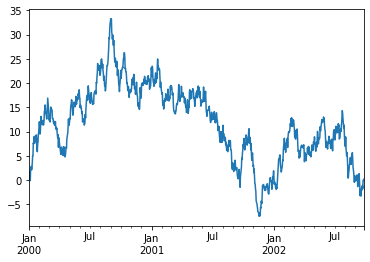

In [62]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

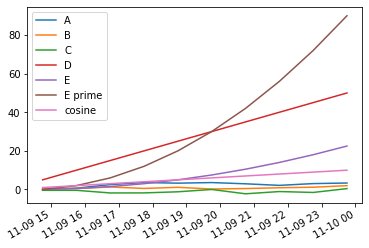

In [63]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')
